### Análise de reclamações Anac

Identificar as principais reclamações dos consumidores de serviços de transporte áereo no Brasil, no período de 2022 a 2024.


#### 1. Imports

In [1]:
import pandas as pd # tratamento de dados
import numpy as np # tratamento de dados
import matplotlib.pyplot as plt # criar graficos
import geopandas as gpd # criar mapas
import locale
locale.setlocale(locale.LC_ALL, "pt_BR") # setar localidade Brasil e puxar datas com nomes brasileiros
import openpyxl # para trabalhar com excel

#### 2. Carga de dados

In [2]:
# import de dados 
df_2022= pd.read_csv(r"C:/Users/Usuario/Documents/PORTIFOLIO/2025/Analise-reclamacoes-Anac/base_dados/dadosconsumidor2022.csv",sep=';',  low_memory=False, encoding='latin-1')
df_2023= pd.read_csv(r"C:/Users/Usuario/Documents/PORTIFOLIO/2025/Analise-reclamacoes-Anac/base_dados/dadosconsumidor2023.csv",sep=';',  low_memory=False, encoding='latin-1')
df_2024= pd.read_csv(r"C:/Users/Usuario/Documents/PORTIFOLIO/2025/Analise-reclamacoes-Anac/base_dados/dadosconsumidor2024.csv",sep=';',  low_memory=False, encoding='latin-1')

# import de infos das UF brasileiras - dados do IBGE
# dados disponinveis no link: https://www.ibge.gov.br/  Geociências -> Downloads -> cartas_e_mapas -> bcim -> versão2016 —geopacote

info_uf = gpd.read_file(r"C:/Users/Usuario/Documents/PORTIFOLIO/2025/Analise-reclamacoes-Anac/IBGE/bcim_2016_21_11_2018.gpkg", layer='lim_unidade_federacao_a')


In [3]:
# junta os arquivos de reclamacoes em um único arquivo
df= pd.concat([df_2022, df_2023, df_2024])

#### 3. Análise exploratória de dados

In [4]:
# checa colunas de info do df de dados IBGE
info_uf.columns

Index(['nome', 'nomeabrev', 'geometriaaproximada', 'sigla', 'geocodigo',
       'id_produtor', 'id_elementoprodutor', 'cd_insumo_orgao',
       'nr_insumo_mes', 'nr_insumo_ano', 'tx_insumo_documento', 'geometry'],
      dtype='object')

In [5]:
# checa as primeiras linhas do df de uf
info_uf.head(2)

,nome,nomeabrev,geometriaaproximada,sigla,geocodigo,id_produtor,id_elementoprodutor,cd_insumo_orgao,nr_insumo_mes,nr_insumo_ano,tx_insumo_documento,geometry
0,Goiás,None,Sim,GO,52,1000001,NaN,NaN,NaN,NaN,None,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743..."
1,Mato Grosso do Sul,None,Sim,MS,50,1000001,NaN,NaN,NaN,NaN,None,"MULTIPOLYGON (((-56.09815 -17.1722, -56.09159 ..."


In [6]:
# valores unicos
info_uf.nunique()

nome                   27
nomeabrev               0
geometriaaproximada     1
sigla                  27
geocodigo              27
id_produtor             1
id_elementoprodutor     0
cd_insumo_orgao         1
nr_insumo_mes           0
nr_insumo_ano           0
tx_insumo_documento     0
geometry               27
dtype: int64

In [7]:
# checa informacoes do df
info_uf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   nome                 27 non-null     object  
 1   nomeabrev            0 non-null      object  
 2   geometriaaproximada  27 non-null     object  
 3   sigla                27 non-null     object  
 4   geocodigo            27 non-null     object  
 5   id_produtor          27 non-null     int32   
 6   id_elementoprodutor  0 non-null      float64 
 7   cd_insumo_orgao      11 non-null     float64 
 8   nr_insumo_mes        0 non-null      float64 
 9   nr_insumo_ano        0 non-null      float64 
 10  tx_insumo_documento  0 non-null      object  
 11  geometry             27 non-null     geometry
dtypes: float64(4), geometry(1), int32(1), object(6)
memory usage: 2.6+ KB


In [8]:
# mostra a quantidade de linhas e colunas da base de dados de reclamacoes
df.shape

(301269, 28)

In [ ]:
# checa as primeiras linhas do df de reclamacoes de consumidores - ANAC
df.head(2)

,Gestor,Região,UF,Cidade,Ano Abertura,Mês Abertura,Data Abertura,Data e Hora Resposta,Data e Hora Análise,Data e Hora Recusa,...,Problema,Forma Contrato,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Edição de Conteúdo,Interação do Gestor,Código Classificador ANAC
0,Secretaria Nacional do Consumidor,CO,DF,Brasília,2022,1,01/01/2022,03/01/2022 16:59,NaN,NaN,...,Dificuldade / atraso na devolução de valores p...,Internet,S,S,Finalizada avaliada,Resolvida,5.0,N,N,S;M;W;D;P;1100
1,Secretaria Nacional do Consumidor,CO,DF,Brasília,2022,1,01/01/2022,04/01/2022 10:50,NaN,NaN,...,Atraso de voo,Internet,S,S,Finalizada avaliada,Resolvida,5.0,N,N,N;M;O;D;P;9900


In [10]:
# checa os tipos de dados e se há valores ausentes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301269 entries, 0 to 90594
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Gestor                          301269 non-null  object 
 1   Região                          301269 non-null  object 
 2   UF                              301269 non-null  object 
 3   Cidade                          301269 non-null  object 
 4   Ano Abertura                    301269 non-null  int64  
 5   Mês Abertura                    301269 non-null  int64  
 6   Data Abertura                   301269 non-null  object 
 7   Data e Hora Resposta            298485 non-null  object 
 8   Data e Hora Análise             2885 non-null    object 
 9   Data e Hora Recusa              2937 non-null    object 
 10  Data Finalização                274193 non-null  object 
 11  Prazo Resposta                  301269 non-null  object 
 12  Prazo Análise Gestor (

In [11]:
# checar valores  duplicadas
df.duplicated().sum()

np.int64(185)

In [12]:
# remove valores duplicados e mantém o último registro
df = df.drop_duplicates(keep='last')

In [13]:
# checar valores  duplicadas
df.duplicated().sum()

np.int64(0)

In [ ]:
# checa quantidade de linhas e colunas do df após a exclusao de valores duplicados
df.shape

(301084, 28)

In [15]:
#checa valores unicos
df.nunique()

Gestor                                19
Região                                 5
UF                                    27
Cidade                              3448
Ano Abertura                           3
Mês Abertura                          12
Data Abertura                       1096
Data e Hora Resposta              208420
Data e Hora Análise                 2863
Data e Hora Recusa                  2923
Data Finalização                    1131
Prazo Resposta                      1105
Prazo Análise Gestor (em dias)        24
Tempo Resposta (em dias)              28
Nome Fantasia                         51
Área                                   5
Assunto                               10
Grupo Problema                         8
Problema                              73
Forma Contrato                         9
Procurou Empresa                       2
Respondida                             2
Situação                               7
Avaliação Reclamação                   3
Nota do Consumid

4. Limpeza e tratamento de dados

In [16]:
# identificando colunas categoricas
colunas_categoricas = df.select_dtypes(exclude='number').columns
colunas_categoricas

Index(['Gestor', 'Região', 'UF', 'Cidade', 'Data Abertura',
       'Data e Hora Resposta', 'Data e Hora Análise', 'Data e Hora Recusa',
       'Data Finalização', 'Prazo Resposta', 'Nome Fantasia', 'Área',
       'Assunto', 'Grupo Problema', 'Problema', 'Forma Contrato',
       'Procurou Empresa', 'Respondida', 'Situação', 'Avaliação Reclamação',
       'Edição de Conteúdo', 'Interação do Gestor',
       'Código Classificador ANAC'],
      dtype='object')

In [17]:
# identificando colunas numericas
colunas_numericas = df.select_dtypes(include='number').columns
colunas_numericas

Index(['Ano Abertura', 'Mês Abertura', 'Prazo Análise Gestor (em dias)',
       'Tempo Resposta (em dias)', 'Nota do Consumidor'],
      dtype='object')

In [18]:
# tratamento de datas
df['Data Finalização']=pd.to_datetime(df['Data Finalização'], format=("%d/%m/%Y"))
df['Ano Finalização']=df['Data Finalização'].dt.year
df['Mês Finalização']=df['Data Finalização'].dt.month

df['Data Abertura'] = pd.to_datetime(df['Data Abertura'], format=("%d/%m/%Y"))
df['Nome Mês Abertura'] = df['Data Abertura'].dt.strftime('%b')


In [19]:
# removendo colunas desnecessarias 
df= df.drop(columns=['Gestor', 'Região', 'Data e Hora Resposta', 'Data e Hora Recusa', 'Forma Contrato', 'Data e Hora Análise','Procurou Empresa','Avaliação Reclamação','Nota do Consumidor', 'Edição de Conteúdo','Interação do Gestor','Prazo Resposta', 'Nome Fantasia','Situação', 'Prazo Análise Gestor (em dias)','Tempo Resposta (em dias)'])

In [20]:
# checa as primeiras linhas 
df.head(2)

,UF,Cidade,Ano Abertura,Mês Abertura,Data Abertura,Data Finalização,Área,Assunto,Grupo Problema,Problema,Respondida,Código Classificador ANAC,Ano Finalização,Mês Finalização,Nome Mês Abertura
0,DF,Brasília,2022,1,2022-01-01,2022-01-07,Transportes,Aéreo,Cobrança / Contestação,Dificuldade / atraso na devolução de valores p...,S,S;M;W;D;P;1100,2022.0,1.0,jan
1,DF,Brasília,2022,1,2022-01-01,2022-01-22,Transportes,Aéreo,Vício de Qualidade,Atraso de voo,S,N;M;O;D;P;9900,2022.0,1.0,jan


#### 5. Análises e gráficos

1. Evolução do % de crescimento e quantidade de reclamações no Brasil por ano 

In [21]:
# filtra df 
df_ano = df[['Ano Abertura','Data Abertura']]

# agrupa df
df_ano= df_ano.groupby('Ano Abertura').count().sort_values(by='Data Abertura',ascending=False).reset_index()
df_ano = df_ano.rename(columns={'Data Abertura': 'Qtde_reclamacoes'})

# cálculos
df_ano['% Crescimento'] = round(df_ano['Qtde_reclamacoes'].pct_change()*100,1)
df_ano['Qtde reclamacoes resumidas']= (df_ano['Qtde_reclamacoes']/1000).astype(int)
df_ano

,Ano Abertura,Qtde_reclamacoes,% Crescimento,Qtde reclamacoes resumidas
0,2022,114343,NaN,114
1,2023,96188,-15.9,96
2,2024,90553,-5.9,90


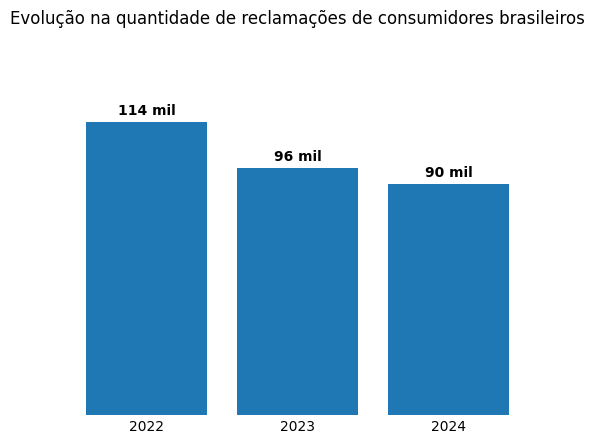

In [ ]:
# cria o grafico
plt.figure(figsize = (6, 4))

barras = plt.bar(df_ano['Ano Abertura'],(df_ano['Qtde reclamacoes resumidas']))

plt.bar_label(barras, labels=df_ano['Qtde reclamacoes resumidas'].apply(lambda x: '{} mil'.format(x)),
              padding=3,
              fontsize=10,
              fontweight='bold',
             label_type='edge'            
)


plt.title('Evolução na quantidade de reclamações de consumidores brasileiros', pad=60)

# forçar os anos a serem exibidos com inteiros
plt.xticks(ticks=df_ano['Ano Abertura'])

# retirando o eixo x
plt.yticks([])

# diminuindo os ticks do eixo y
plt.tick_params(axis='x', length=0)


# retira bordas 
plt.box(False)

# salva como figura
# area do gráfico ajustada  bbox_inches='tight'
plt.savefig('imagens/grafico_evolucao_reclamacoes.png', bbox_inches='tight', dpi=300)

1.1 - Como foi a evolução do % de reclamações ao longo dos meses durante o período ?

In [23]:
# filtra df
df_ano = df[['Mês Abertura','Nome Mês Abertura','Data Abertura']]

# agrupa os dados
df_ano= df_ano.groupby(['Nome Mês Abertura','Mês Abertura'])['Data Abertura'].count().reset_index()
df_ano = df_ano.rename(columns={'Data Abertura': 'Qtde_reclamacoes'})
df_ano = df_ano.sort_values(by='Mês Abertura').set_index('Mês Abertura')

# cálculo
df_ano['% Reclamacoes'] = df_ano['Qtde_reclamacoes']/df.shape[0]

df_ano


,Nome Mês Abertura,Qtde_reclamacoes,% Reclamacoes
Mês Abertura,,,
1,jan,34177,0.113513
2,fev,25312,0.084070
3,mar,26641,0.088484
4,abr,23020,0.076457
5,mai,24479,0.081303
6,jun,23521,0.078121
7,jul,23223,0.077131
8,ago,25474,0.084608
9,set,22967,0.076281


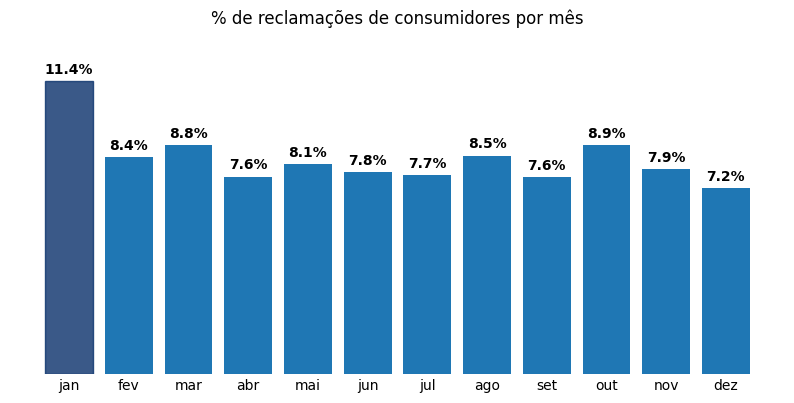

In [24]:
# cria o grafico

plt.figure(figsize = (10, 4))

barras = plt.bar(df_ano['Nome Mês Abertura'],df_ano['% Reclamacoes'])

plt.bar_label(barras, labels=df_ano['% Reclamacoes'].apply(lambda x: '{:.1%}'.format(x)),
              padding=3,
              fontsize=10,
              fontweight='bold',
             label_type='edge'            
)

plt.title('% de reclamações de consumidores por mês', pad=30)


# forçar os anos a serem exibidos com inteiros
plt.xticks(ticks=df_ano['Nome Mês Abertura'])

# retirando o eixo x
plt.yticks([])

# diminuindo os ticks do eixo y
plt.tick_params(axis='x', length=0)


# destacando a barra com a maior qtde de reclamações
barras[0].set_color('#08306B')
barras[0].set_alpha(0.8)
          

# retira bordas 
plt.box(False)


# salva como figura
# area do gráfico ajustada  bbox_inches='tight'
plt.savefig('imagens/grafico_reclamacoes_por_mes.png', bbox_inches='tight', dpi=300)

2. Qual o % de reclamações por UF ?

<Figure size 600x400 with 0 Axes>

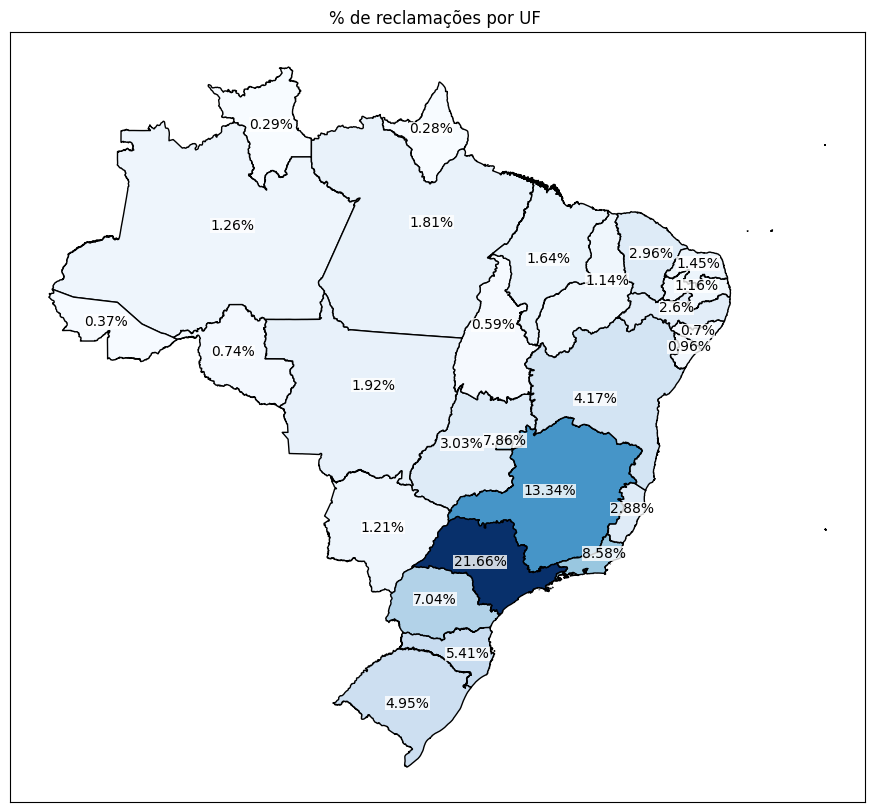

In [25]:
plt.figure(figsize = (6, 4))

#filtra o df original 
df_uf= df[['UF', 'Data Abertura']]


#agrupamento, contagem e dados
df_uf= df_uf.groupby('UF').count().sort_values(by='Data Abertura',ascending=False).reset_index()
df_uf= df_uf.rename(columns={'Data Abertura':'Qtde_reclamacoes'})
df_uf['%_Reclamacoes'] = round((df_uf['Qtde_reclamacoes']/df.shape[0])*100,2)


# cria df Brasil com qtde reclamacoes e dados de reclamacoes
info_uf= info_uf.rename(columns={'sigla':'UF'})
qtde_brasil = info_uf.merge(df_uf, on='UF', how='left')
qtde_brasil[['UF','%_Reclamacoes','geometry']]


#cria o gráfico
qtde_brasil.plot(column='%_Reclamacoes',
                 cmap='Blues',
                 figsize = (16,10),
                 legend= False,
                 edgecolor= 'black')

# cria o titulo do gráfico
plt.title('% de reclamações por UF ')

# retirando o eixo x
plt.xticks([])

# diminuindo os ticks do eixo y
plt.yticks([])

# cria os labels com % dentro de cada UF                 
qtde_brasil['coords'] = qtde_brasil['geometry'].apply(lambda x: x.representative_point().coords[0])
for idx, row in qtde_brasil.iterrows():
    plt.text(row.coords[0],row.coords[1],
            s='{}%'.format(row['%_Reclamacoes']),
            horizontalalignment='center',
            bbox={'facecolor':'w',
                  'alpha':0.8,
                  'pad': 0.1,
                  'edgecolor':'none'})
    
# salva como figura
# area do gráfico ajustada  bbox_inches='tight'
plt.savefig('imagens/grafico_reclamacoes_uf.png', bbox_inches='tight', dpi=300)    

3. Quais as 5 cidades com os maiores % de reclamações ?

In [27]:
# filtra o df
df_cidade = df[['Cidade', 'Data Abertura']]

# agrupa dados e cálculos
df_cidade= df_cidade.groupby(['Cidade']).count().sort_values(by='Data Abertura',ascending=False).reset_index()
df_cidade = df_cidade.rename(columns= {'Data Abertura':'Qtde reclamacoes'})

# seleciona as 5 cidades com mais reclamacoes
df_top5_cidades = df_cidade.nlargest(5,'Qtde reclamacoes','first')
df_top5_cidades['% Reclamacoes']=  df_cidade['Qtde reclamacoes']/df.shape[0]

df_top5_cidades


,Cidade,Qtde reclamacoes,% Reclamacoes
0,São Paulo,31384,0.104237
1,Brasília,23666,0.078603
2,Belo Horizonte,18663,0.061986
3,Rio de Janeiro,18124,0.060196
4,Curitiba,10362,0.034416


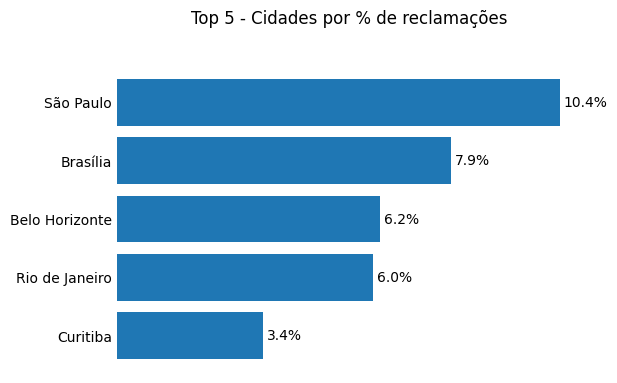

In [28]:
# cria o gráfico
plt.figure(figsize = (6, 4))

barras = plt.barh(df_top5_cidades['Cidade'], df_top5_cidades['% Reclamacoes'])

plt.bar_label(barras, 
             labels=df_top5_cidades['% Reclamacoes'].apply(lambda x: '{:.1%}'.format(x)),
             padding= 3
)

plt.title('Top 5 - Cidades por % de reclamações', pad=30)

plt.tick_params(axis='y', length=0)
plt.xticks([])

plt.gca().invert_yaxis() #ordena as barras do maior para o menor

plt.box(False)

# salva como figura
# area do gráfico ajustada  bbox_inches='tight'
plt.savefig('imagens/grafico_por_cidades.png', bbox_inches='tight', dpi=300)

4. Qual o % de reclamações por Área e por ano ?

In [ ]:
#filtra o df
df_area = df[['Área','Data Abertura']]

# agrupa os dados
df_area = df_area.groupby(['Área']).count().sort_values(by='Data Abertura', ascending=False)
df_area = df_area.rename(columns= {'Data Abertura':'Qtde reclamacoes',
                                   'Área': 'Area'})

# cálculos
df_area['% Reclamacoes']=  df_area['Qtde reclamacoes']/df.shape[0] # Total de reclamacoes/ Total de linhas do df
df_area['% Reclamacoes'] = df_area['% Reclamacoes']
df_area

# exporta para excel
df_area.to_excel('resumos/reclamacoes_por_area.xlsx')


5. Qual o % de reclamações dos Top5 problemas na Área de transportes no período ?

In [30]:
# filtra o df para área de transporte
df_problema = df['Área']== 'Transportes'
df_problema = df[['Problema','Data Abertura']]

# agrupa dados 
df_problema = df_problema.groupby(['Problema']).count().sort_values(by='Data Abertura', ascending=False).reset_index()
df_problema = df_problema.rename(columns= {'Data Abertura':'Qtde reclamacoes'})

# cálculos
df_problema['% Reclamacoes']=  df_problema['Qtde reclamacoes']/df.shape[0]
df_top5_problema_transportes = df_problema.nlargest(5,'% Reclamacoes','first')
df_top5_problema_transportes

,Problema,Qtde reclamacoes,% Reclamacoes
0,Dificuldade / atraso na devolução de valores p...,52490,0.174337
1,Cancelamento de voo,29386,0.097601
2,Oferta não cumprida / serviço não fornecido/ v...,24399,0.081037
3,SAC - Demanda não resolvida / não respondida /...,22678,0.075321
4,"Extravio/ avaria de bagagem, carga, correspond...",21075,0.069997


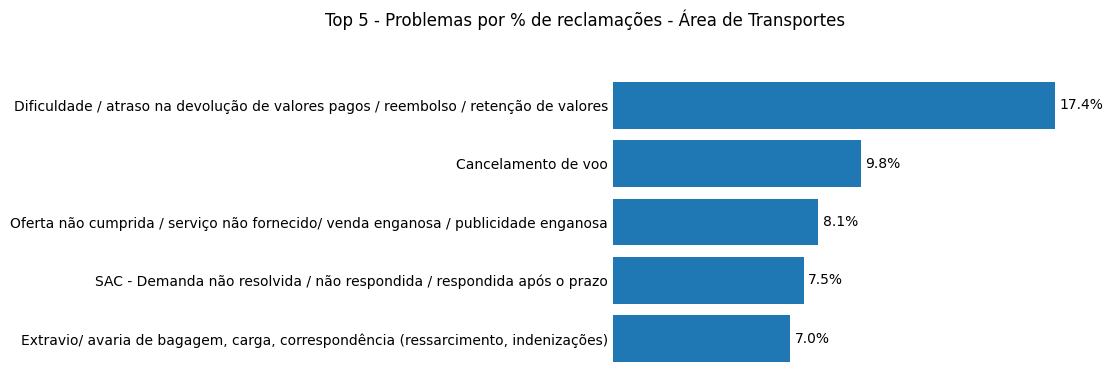

In [31]:
# cria o gráfico
plt.figure(figsize = (6, 4))

barras = plt.barh(df_top5_problema_transportes['Problema'], df_top5_problema_transportes['% Reclamacoes'])

plt.bar_label(barras, 
             labels=df_top5_problema_transportes['% Reclamacoes'].apply(lambda x: '{:.1%}'.format(x)),
             padding= 3
)


plt.title('Top 5 - Problemas por % de reclamações - Área de Transportes', pad=30, ha='right')


plt.tick_params(axis='y', length=0)
plt.xticks([])

plt.gca().invert_yaxis() #ordena as barras do maior para o menor

plt.box(False)


# salva como figura
# area do gráfico ajustada  bbox_inches='tight'
plt.savefig('imagens/grafico_por_problemas.png', bbox_inches='tight', dpi=300)

6. Qual o % de resposta a reclamacoes por ano?

In [32]:
df.shape

(301084, 15)

In [33]:
#filtra o df com as colunas necessárias para a análise
df_reclamacoes = df[['Respondida', 'Data Abertura']]

# agrupa os dados 
df_reclamacoes = df_reclamacoes.groupby(['Respondida']).count().reset_index()
df_reclamacoes = df_reclamacoes.rename(columns= {'Data Abertura':'Qtde respostas'})

# cálculos
df_reclamacoes['% Reclamacoes']=  round((df_reclamacoes['Qtde respostas']/df.shape[0]*100),1)
df_reclamacoes

,Respondida,Qtde respostas,% Reclamacoes
0,N,2687,0.9
1,S,298397,99.1
